# Unit 05

`````{tab-set}
````{tab-item} Objective

::::{important} Objective

The goal of this session is to explore the potential energy surfaces (PES) of three molecules — ethanol, vinyl alcohol, and glycol — by scanning internal coordinates and interpolating between molecular geometries. Through this activity, you will learn about potential energy curves, equilibrium (minimum) and non-equilibrium geometries, and transition states. The learning goal is to gain insight into how molecular structures relate to their energy profiles and how these relationships are crucial for understanding molecular stability and reaction mechanisms.

::::

````

````{tab-item} Further Information

:::{admonition}Further Information
- [`veloxchem` package](https://veloxchem.org/docs/intro.html)
- [`eChem` tutorials](https://kthpanor.github.io/echem/docs/title.html)
- [`geodesic_interpolate` source](https://github.com/virtualzx-nad/geodesic-interpolate.git)
:::

````
`````

In [1]:
import sys, os
import numpy as np
import scipy
from matplotlib import pyplot as plt

import veloxchem as vlx
# import geodesic_interpolate 


## A) Ethanol

::::{tip} Task 5.1

- Perform a geometry optimization of ethanol, provided as an xyz_string, using the XTB method in VeloxChem.
- Plot the energy variation during each iteration of the optimization process.
- Examine the structural changes during the optimization.

:::{admonition} XTB optimization with VeloxChem
:class: dropdown

In the following a workflow for optimizing the structure of a molecule with VeloxChem based on the semiempiriical method called xTB is given:

```{code-block} python
:lineno-start: 1

import veloxchem as vlx

```

The initial structure can e.g. be defined in terms of a XYZ string.

```{code-block} python
:lineno-start: 2

in_mol_ethanol = vlx.Molecule.from_xyz_string(in_xyz_ethanol)

```

Define the electronic structure theory method.

```{code-block} python
:lineno-start: 3

scf_drv = vlx.XtbDriver()

```

Optimize the molecule structure with the ```OptimizationDriver``` class in VeloxChem.

```{code-block} python
:lineno-start: 4

opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute() # to mute printing in notebook

opt_results = opt_drv.compute(molecule)

```

:::


:::{admonition} Visualize a 3D molecular structure with VeloxChem
:class: dropdown

You can visualize a 3D molecular structure using VeloxChem with the ```show()``` function of the ```Molecule``` object. 
To this end, you need to convert e.g. the xyz string into a ```veloxchem.Molecule``` object.

```{code-block} python
:lineno-start: 1
:emphasize-lines: 3

import veloxchem as vlx

in_mol_ethanol = vlx.Molecule.from_xyz_string(in_xyz_ethanol)
in_mol_ethanol.show()
# with indices
in_mol_ethanol.show(atom_indices=True)

```
:::


:::{admonition} Visualize multiple 3D molecular structures on a grid
:class: dropdown

You can visualize multiple 3D molecular structures on a grid using py3Dmol:

```{code-block} python
:lineno-start: 1
:emphasize-lines: 3,4,5

import py3Dmol as p3d

viewer = p3d.view(viewergrid=(1,2), width=800, height=300, linked=False)
viewer.addModel(in_xyz_ethanol, "xyz", viewer=(0, 0))
viewer.addModel(opt_xyz_ethanol, "xyz", viewer=(0, 1))
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})
viewer.zoomTo()
viewer.show()

```

:::

:::{admonition} Visualize multiple 3D molecular structures in a video
:class: dropdown

You can visualize multiple 3D molecular structures on top of each other in form of a video by adding geometries as frames:

```{code-block} python
:lineno-start: 1
:emphasize-lines: 4,5

import py3Dmol as p3d

viewer = p3d.view(width=400, height=300)
viewer.addModelsAsFrames('\n'.join(path_geoms))
viewer.animate({"loop": "forward"})
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

viewer.zoomTo()
viewer.show()

```

:::

::::

In [4]:
in_xyz_ethanol = """9
conformer 1
C     -0.953455    0.047804    0.042499
C      0.487919   -0.321539   -0.189050
O      1.276978    0.324784    0.737673
H     -1.357013    0.733975   -0.733223
H     -1.593321   -0.862570    0.021759
H     -1.071031    0.596439    1.011163
H      0.787406   -0.140609   -1.235774
H      0.590028   -1.426110   -0.044030
H      1.832490    1.047825    0.388982
"""

In [5]:
# visualize molecule

with open("ethanol_conformer_1.xyz") as f:
    in_xyz_ethanol = f.read()

# Create a VeloxChem Molecule object
mol_ethanol = vlx.Molecule.from_xyz_string(in_xyz_ethanol)

# Visualize (3D viewer)
mol_ethanol.show()


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [6]:
# optimize structure on xTB level
import veloxchem as vlx


scf_drv = vlx.XtbDriver()
opt_drv = vlx.OptimizationDriver(scf_drv)
opt_drv.ostream.mute() 

opt_results = opt_drv.compute(mol_ethanol)

opt_xyz_ethanol = mol_ethanol.get_xyz_string()


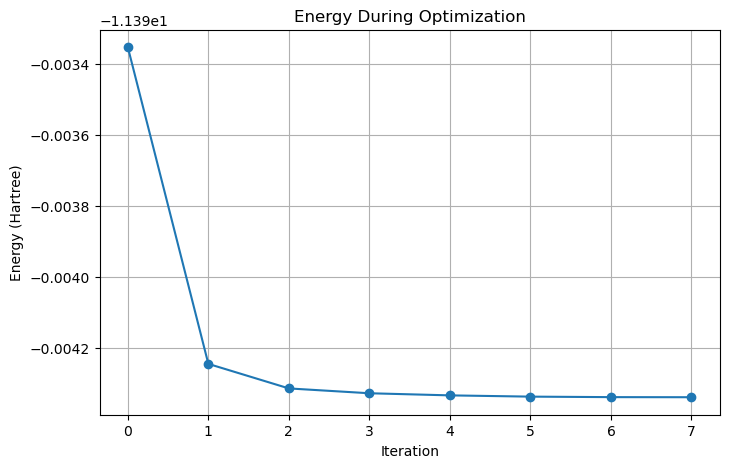

In [7]:
# Plot change in energy during optimization
import matplotlib.pyplot as plt

energies = opt_results['opt_energies']
iterations = list(range(len(energies)))

plt.figure(figsize=(8, 5))
plt.plot(iterations, energies, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Energy (Hartree)')
plt.title('Energy During Optimization')
plt.grid(True)
plt.show()

## A) Ethanol

::::{tip} Task 5.2

Examine the structural changes during the geometry optimization of ethanol to identify the internal coordinate that plays a crucial role. Perform a scan of this internal reaction coordinate using VeloxChem at the xTB level. Plot the potential energy curve and analyze the results (How many minima are observed? How do these minima differ in terms of energy and structure?).

:::{admonition} Scanning internal coordinates with VeloxChem
:class: dropdown

Relaxed scans of internal coordinates can be performed.

```{code-block} python
:lineno-start: 1

opt_drv.constraints = ["scan dihedral 6 1 2 3 0 360 19"]

opt_results = opt_drv.compute(molecule)

```

:::

::::

In [8]:
# relaxed scan ethanol
opt_mol = vlx.Molecule.from_xyz_string(opt_results['final_geometry'])

opt_drv.constraints = ["scan dihedral 6 1 2 3 0 360 19"]
scan_results = opt_drv.compute(opt_mol)

# --- process ethanol scan for PES comparison ---
energies_ethanol = np.array(scan_results['scan_energies'])  # already flat list
angles_ethanol = np.linspace(0, 360, len(energies_ethanol))

# convert to relative energies (Hartree → kJ/mol)
energies_ethanol_rel = (energies_ethanol - np.min(energies_ethanol)) * 2625.5


print(scan_results.keys())

dict_keys(['final_geometry', 'scan_energies', 'scan_geometries'])


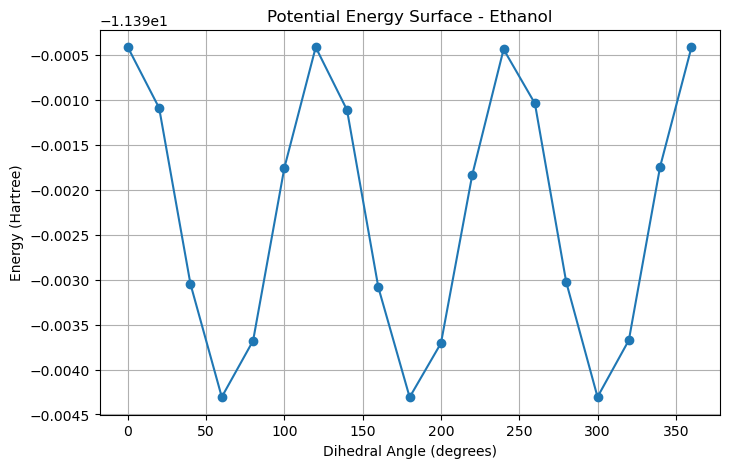

In [9]:
# plot potential energy curve
import matplotlib.pyplot as plt
import numpy as np

energies = scan_results['scan_energies']
angles = np.linspace(0, 360, len(energies))

plt.figure(figsize=(8, 5))
plt.plot(angles, energies, marker='o')
plt.xlabel('Dihedral Angle (degrees)')
plt.ylabel('Energy (Hartree)')
plt.title('Potential Energy Surface - Ethanol')
plt.grid(True)
plt.show()


## B) Vinyl Alcohol

::::{tip} Task 5.3

Next, we want to scan internal torsion coordinates of vinyl alcohol, which is the alkene version of ethanol. As for ethanol, optimize the geometry of vinyl alcohol given as xyz string by means of xTB using Veloxchem. Scan a similar internal coordinate as for ethanol. How do the two profiles compare with each other: How many minima are observed, how do they differ them in relative energy (predicted energy minus the energy of the minimum geometry for every molecule). 

:::{admonition} Visualize multiple 3D molecular structures in a video
:class: dropdown

You can visualize multiple 3D molecular structures on top of each other in form of a video by adding geometries as frames:

```{code-block} python
:lineno-start: 1
:emphasize-lines: 4,5

import py3Dmol as p3d

viewer = p3d.view(width=400, height=300)
viewer.addModelsAsFrames('\n'.join(path_geoms))
viewer.animate({"loop": "forward"})
viewer.setViewStyle({"style": "outline", "width": 0.05})
viewer.setStyle({"stick": {}, "sphere": {"scale": 0.25}})

viewer.zoomTo()
viewer.show()

```

:::
::::

In [10]:
in_xyz_vinyl = """7
guess geom vinyl alcohol
C     -0.540615   -0.743375   -0.157317
C     -0.186313    0.533386    0.074933
O      1.102593    0.988457   -0.146522
H     -1.551551   -1.094513    0.017848
H      0.234966   -1.402310   -0.527986
H     -0.900087    1.253825    0.445089
H      1.841007    0.464531    0.293954
"""

In [26]:
# optimize structure of vinyl alcohol
import veloxchem as vlx

# build Molecule object
mol_vinyl = vlx.Molecule.from_xyz_string(in_xyz_vinyl)

# xTB driver + geometry optimization
scf_drv_vinyl = vlx.XtbDriver()
opt_drv_vinyl = vlx.OptimizationDriver(scf_drv_vinyl)
opt_drv_vinyl.ostream.mute()           # avoid spam

opt_results_vinyl = opt_drv_vinyl.compute(mol_vinyl)

# extract optimized geometry and energies
opt_xyz_vinyl = opt_results_vinyl['final_geometry']
Eopt_vinyl = opt_results_vinyl['opt_energies'][-1]
print(f"Optimized xTB energy (vinyl alcohol): {Eopt_vinyl:.6f} Hartree")


Optimized xTB energy (vinyl alcohol): -10.347576 Hartree


In [27]:
# plot optimized structure
opt_mol_vinyl = vlx.Molecule.from_xyz_string(opt_xyz_vinyl)
opt_mol_vinyl.show()          # 3D view in notebook
opt_mol_vinyl.show(atom_indices=True)  # if you want indices


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

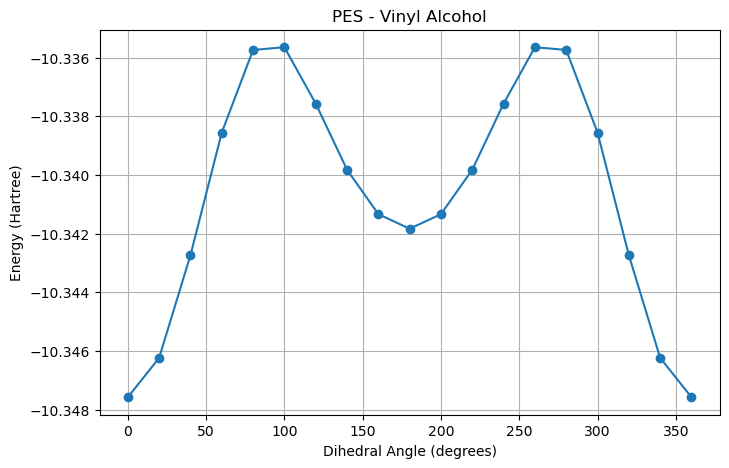

In [31]:
# relaxed scan like for ethanol and plotting of PES
opt_drv.constraints = ["scan dihedral 7 3 2 1 0 360 19"]
vinyl_scan_results = opt_drv.compute(opt_mol_vinyl)

angles = np.linspace(0, 360, len(vinyl_scan_results['scan_energies']))
plt.figure(figsize=(8, 5))
plt.plot(angles, vinyl_scan_results['scan_energies'], marker='o')
plt.xlabel('Dihedral Angle (degrees)')
plt.ylabel('Energy (Hartree)')
plt.title('PES - Vinyl Alcohol')
plt.grid(True)
plt.show()

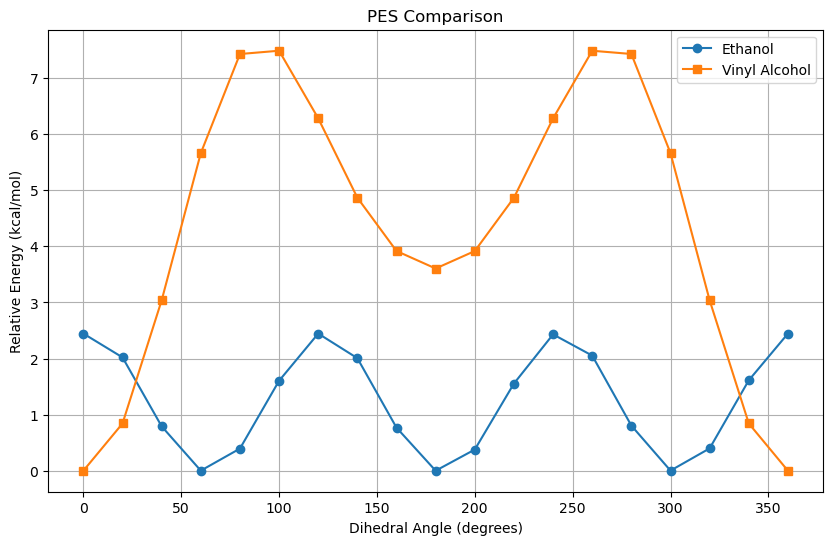

Ethanol: 12 minima
Vinyl Alcohol: 4 minima


In [32]:
# comparison vinyl alcohol and ethanol scan
eth_energies = np.array(scan_results['scan_energies'])
vin_energies = np.array(vinyl_scan_results['scan_energies'])

# Relative energies in kcal/mol
eth_rel = (eth_energies - eth_energies.min()) * 627.509
vin_rel = (vin_energies - vin_energies.min()) * 627.509

angles = np.linspace(0, 360, len(eth_rel))

plt.figure(figsize=(10, 6))
plt.plot(angles, eth_rel, marker='o', label='Ethanol')
plt.plot(angles, vin_rel, marker='s', label='Vinyl Alcohol')
plt.xlabel('Dihedral Angle (degrees)')
plt.ylabel('Relative Energy (kcal/mol)')
plt.title('PES Comparison')
plt.legend()
plt.grid(True)
plt.show()

print(f"Ethanol: {np.sum(eth_rel < 2)} minima")
print(f"Vinyl Alcohol: {np.sum(vin_rel < 2)} minima")

## C) Ethylene Glycol

::::{tip} Task 5.4

Visualize the xTB-optimized structure of a single conformer of ethylene glycol, starting from an initial geometry provided as an XYZ string. Ethylene glycol has 8 stable conformers ($2^3 = 8$). Consider the possible structures of these conformers and optimize the geometries for all 8 configurations. Determine which conformer is the most stable. 

:::{admonition} Set internal coordinates
:class: dropdown

We can define dihedral angles (internal coordinates) for a given structure with

```{code-block} python
:lineno-start: 1

molecule = vlx.Molecule.read_smiles("OC=CC=O")
molecule.set_dihedral_in_degrees((6,1,2,3), 180.0)

```

:::

:::{admonition} Set and freeze internal coordinates 
:class: dropdown

A selection of internal coordinates can be set or frozen during the molecular structure optimization, where the latter choice means that they are frozen to the values given in the initial structure. These options apply to internal coordinates of the types:

- distance
- angle
- dihedral


```{code-block} python
:lineno-start: 1
:emphasize-lines: 2,3

opt_drv.constraints = [
    "set dihedral 6 1 2 3 0.0",
    "freeze distance 6 1",
]

opt_results = opt_drv.compute(molecule)

```
:::

:::{admonition} Unit conversion in VeloxChem
:class: dropdown


The factors to convert the energies from Hartree to, e.g., kcal/mol are stored in veloxchem class:

```{code-block} python
:lineno-start: 1

vlx.hartree_in_kcalpermol()

```
:::

::::

In [ ]:
in_xyz_glycol_c1 ="""9
one conformer of ethylene glycol
O      1.593715    0.242046    0.409526
C      0.723313    0.115915   -0.668740
C     -0.595243   -0.016409   -0.499548
C     -1.263075   -0.043422    0.813780
O     -0.618095    0.059110    1.890911
H      2.589448    0.341097    0.254902
H      1.127281    0.125393   -1.673718
H     -1.218911   -0.110290   -1.379727
H     -2.338433   -0.154573    0.852613
"""

mol_glycol_c1 = vlx.Molecule.from_xyz_string(in_xyz_glycol_c1)
mol_glycol_c1.show(atom_indices=True)

3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [ ]:
# define conformers and optimize them


In [ ]:
# visualize conformer structures


In [ ]:
# Get relative enrgies of the conformers in kcal/mol


::::{tip} *Task 5.5

Sample the rigid (not optimized) potential energy curve between the most stable conformer (0.0 kcal/mol) and the second stable conformer (5.78 kcal/mol).
Do this by scanning dihedral angles (rigid scan) or by means of geometry interpolation with the ```geodesic_interpolate``` package ([see Github](https://github.com/virtualzx-nad/geodesic-interpolate)). Compute for a given path the energies at xTB level and plot them in the same graph. Are the paths similar? Which path faces the lower energy barrier?

:::{admonition} geodesic_interpolate
:class: dropdown

To interpolate between geometries, we need to convert the XYZ strings into arrays of coordinates and a list of the element names. This can be realized with the following functions:

```{code-block} python
:lineno-start: 1

def parse_coordinates(conformer_str):
    
    lines = conformer_str.strip().split('\n')[2:]
    
    symbols = [line.split()[0] for line in lines]
    coordinates = [list(map(float, line.split()[1:])) for line in lines]
    
    return symbols, np.array(coordinates)

```

The interpolation can be done by

```{code-block} python
:lineno-start: 9

import geodesic_interpolate as geo_inter

raw = geo_inter.redistribute(symbols, X, nimages=19, tol=2e-6)
smoother = geo_inter.Geodesic(symbols, raw, scaler=1.7, threshold=3, min_neighbors=4, friction=0.001)
path = smoother.sweep(max_iter=20, micro_iter=55)

```

:::

::::

## Rigid Interpolation or Scan

In [ ]:
# Option 1: perform rigid interpolation and get energies of the respective images, e.g. 19 interpolated geoms



## Rigid Scan

In [ ]:
# Option 2: perform rigid scans and get energies of the respective scan geometries (e.g. also 19 like before)



## Plot results of Interpolation and Scan

In [ ]:
# Plot the results of the rigid scan and -interpolation in one plot

